In [69]:
#Import Pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
volcano_df = pd.read_csv('./data/Vol_combine.csv')


In [71]:
volcano_df.head()

,Volcano Name,Country,Latitude,Longitude,Elevation (m),Type,Status,Last Known Eruption,year,mo,dy,tsu,eq,vei,deaths,damage_mil,houses_destroyed,total_deaths,total_damage_mil
0,Macauley,New Zealand,-30.210,-178.475,238.0,Caldera,Holocene,U,-4360.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1,Kikai,Japan,30.793,130.305,704.0,Caldera,Historical,D1,-4350.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
2,Masaya,Nicaragua,11.985,-86.165,594.0,Caldera,Historical,D1,-4050.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
3,Witori,Papua New Guinea,-5.576,150.516,724.0,Caldera,Historical,D2,-4000.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
4,Taal,Philippines,14.002,120.993,311.0,Stratovolcano,Historical,D1,-3580.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN


In [72]:
# To get the filtered data by column year that is NOT NaN, means the volcano are all active 
active_volcanoes = volcano_df[volcano_df['year'].notna()]
active_volcanoes.head()

,Volcano Name,Country,Latitude,Longitude,Elevation (m),Type,Status,Last Known Eruption,year,mo,dy,tsu,eq,vei,deaths,damage_mil,houses_destroyed,total_deaths,total_damage_mil
0,Macauley,New Zealand,-30.210,-178.475,238.0,Caldera,Holocene,U,-4360.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1,Kikai,Japan,30.793,130.305,704.0,Caldera,Historical,D1,-4350.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
2,Masaya,Nicaragua,11.985,-86.165,594.0,Caldera,Historical,D1,-4050.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
3,Witori,Papua New Guinea,-5.576,150.516,724.0,Caldera,Historical,D2,-4000.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
4,Taal,Philippines,14.002,120.993,311.0,Stratovolcano,Historical,D1,-3580.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN


In [73]:
# To get the filtered data by column vei, and total deaths rate.

filtered_data = active_volcanoes[active_volcanoes['vei'].notna() & active_volcanoes['total_deaths'].notna()]
filtered_data.head()

,Volcano Name,Country,Latitude,Longitude,Elevation (m),Type,Status,Last Known Eruption,year,mo,dy,tsu,eq,vei,deaths,damage_mil,houses_destroyed,total_deaths,total_damage_mil
29,Vesuvius,Italy,40.821,14.426,1281.0,Complex volcano,Historical,D2,79.0,8.0,25.0,3093.0,58.0,5.0,2100.0,NaN,NaN,2100.0,NaN
35,Ilopango,El Salvador,13.672,-89.053,450.0,Caldera,Historical,D3,450.0,NaN,NaN,NaN,NaN,6.0,30000.0,NaN,NaN,30000.0,NaN
42,Aira,Japan,31.593,130.657,1117.0,Stratovolcano,Historical,D1,764.0,NaN,NaN,NaN,NaN,4.0,80.0,NaN,NaN,80.0,NaN
62,Hekla,Iceland,63.983,-19.666,1490.0,Stratovolcano,Historical,D1,1300.0,7.0,11.0,NaN,NaN,4.0,NaN,NaN,NaN,600.0,NaN
72,Oraefajokull,Iceland,64.000,-16.650,2010.0,Stratovolcano,Historical,D4,1362.0,6.0,5.0,NaN,NaN,5.0,220.0,NaN,NaN,220.0,NaN


In [74]:
# group by VEI and calculate by total deaths
vei_deaths = filtered_data.groupby('vei')['total_deaths'].sum()
vei_deaths


vei
0.0     1087.0
1.0     1775.0
2.0    18754.0
3.0    57106.0
4.0    66822.0
5.0    24046.0
6.0    80719.0
7.0    60000.0
Name: total_deaths, dtype: float64

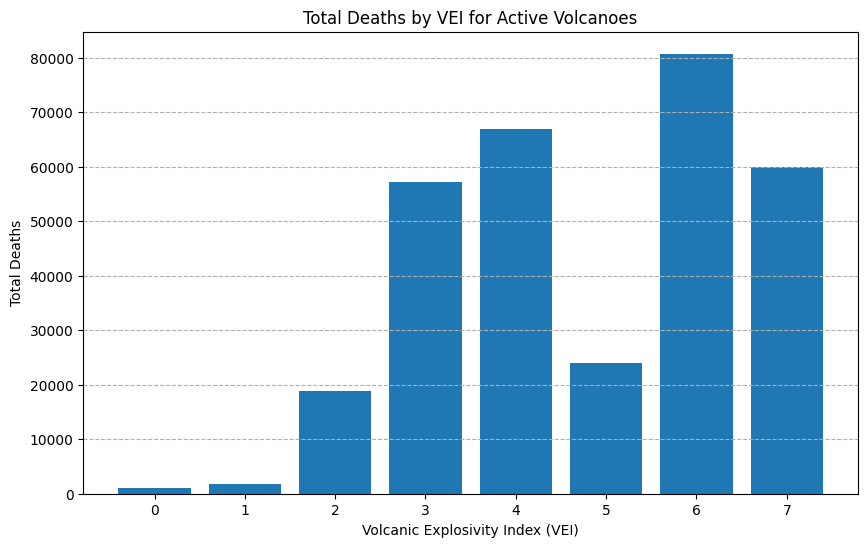

In [75]:
# create the bar chart
plt.figure(figsize=(10, 6))
x = vei_deaths.index
y = vei_deaths.values
plt.bar(x, y)

# add labels and title
plt.xlabel('Volcanic Explosivity Index (VEI)')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by VEI for Active Volcanoes')

# display the plot
plt.grid(axis='y', linestyle='--')
plt.show()

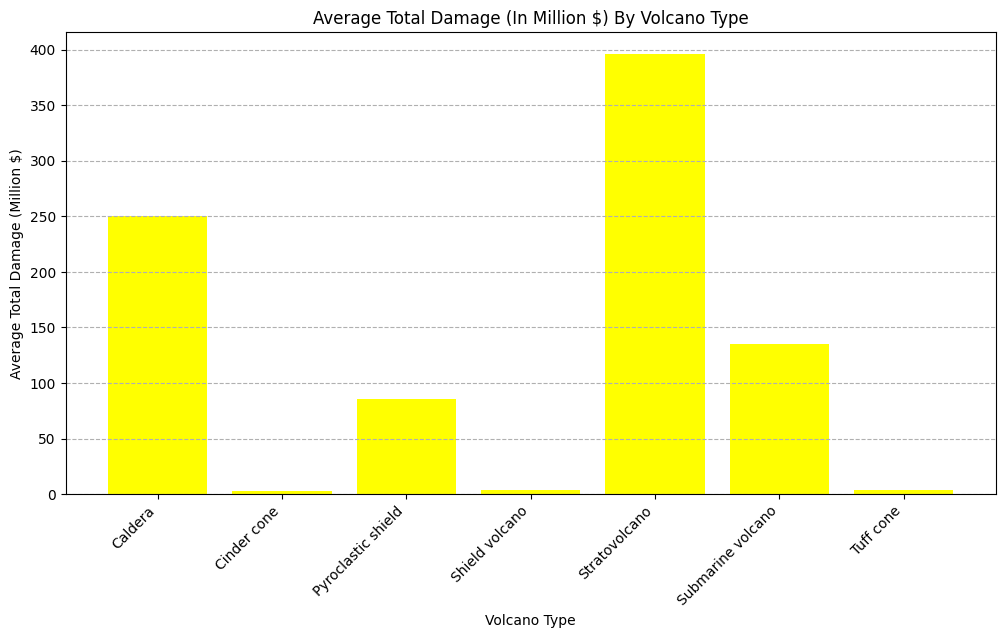

In [76]:
# calculate average total damage by volcano type
average_damage_by_type = filtered_data.groupby('Type')['total_damage_mil'].mean().dropna()

# create a bar chart 
plt.figure(figsize=(12, 6))
x = average_damage_by_type.index
y = average_damage_by_type.values
plt.bar(x, y, color='yellow')

# add labels and title
plt.xlabel('Volcano Type')
plt.ylabel('Average Total Damage (Million $)')
plt.title('Average Total Damage (In Million $) By Volcano Type')
plt.xticks(rotation=45, ha='right')

# display the plot
plt.grid(axis='y', linestyle='--')
plt.show()


In [77]:
tsu_percentage = active_volcanoes['tsu'].notna().mean() * 100
eq_percentage = active_volcanoes['eq'].notna().mean() * 100

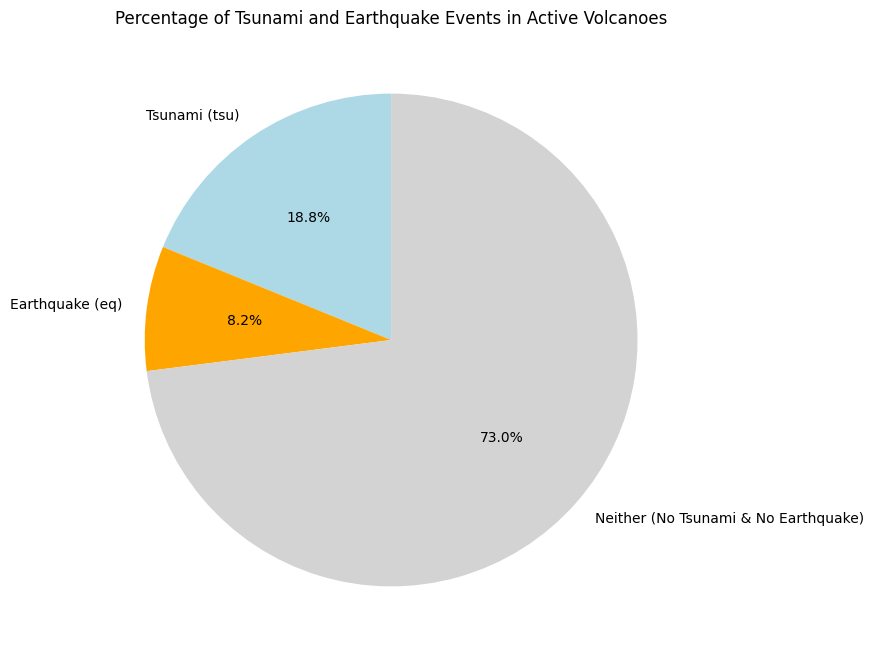

In [78]:
labels = ['Tsunami (tsu)', 'Earthquake (eq)', 'Neither (No Tsunami & No Earthquake)']
sizes = [
    tsu_percentage, 
    eq_percentage, 
    100 - max(tsu_percentage, eq_percentage)
]
colors = ['lightblue', 'orange', 'lightgrey']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title('Percentage of Tsunami and Earthquake Events in Active Volcanoes')

# display the plot
plt.show()


In [79]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

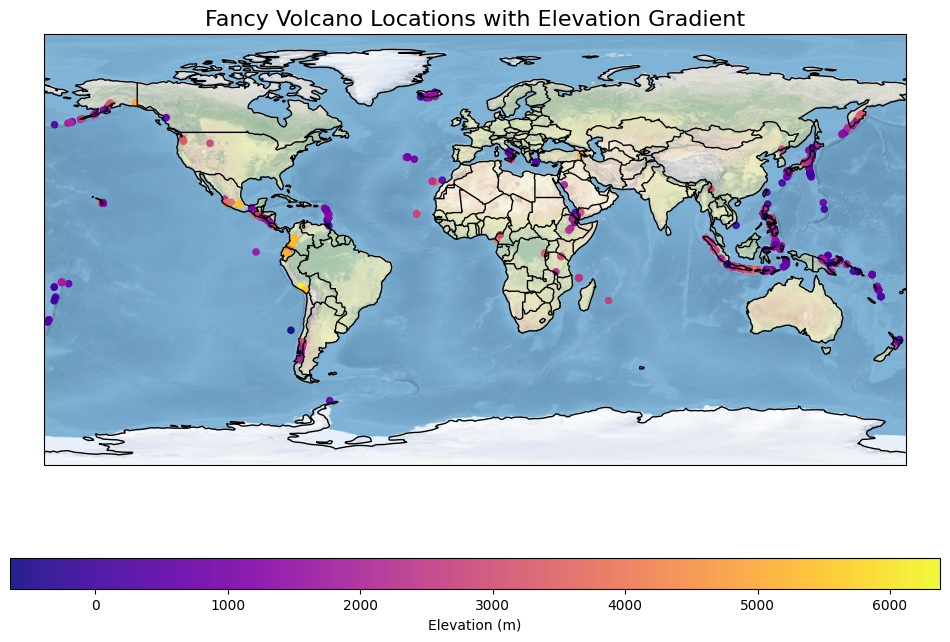

In [80]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import matplotlib.pyplot as plt

# create the figure and axis
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# add coastlines and country borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# add a background image (from Cartopy)
ax.stock_img()

# scatter plot with color based on elevation
scatter = plt.scatter(
    active_volcanoes['Longitude'], 
    active_volcanoes['Latitude'], 
    c = active_volcanoes['Elevation (m)'],
    cmap='plasma',
    s=20,
    alpha=0.9
)

# add a color bar
cbar = plt.colorbar(scatter, orientation='horizontal', aspect=30)
cbar.set_label('Elevation (m)')

plt.title('Fancy Volcano Locations with Elevation Gradient', fontsize=16)

# display the plot
plt.show()


In [81]:
# Group by year and count the number of eruptions per year
eruption_counts = volcano_df.groupby('year').size()

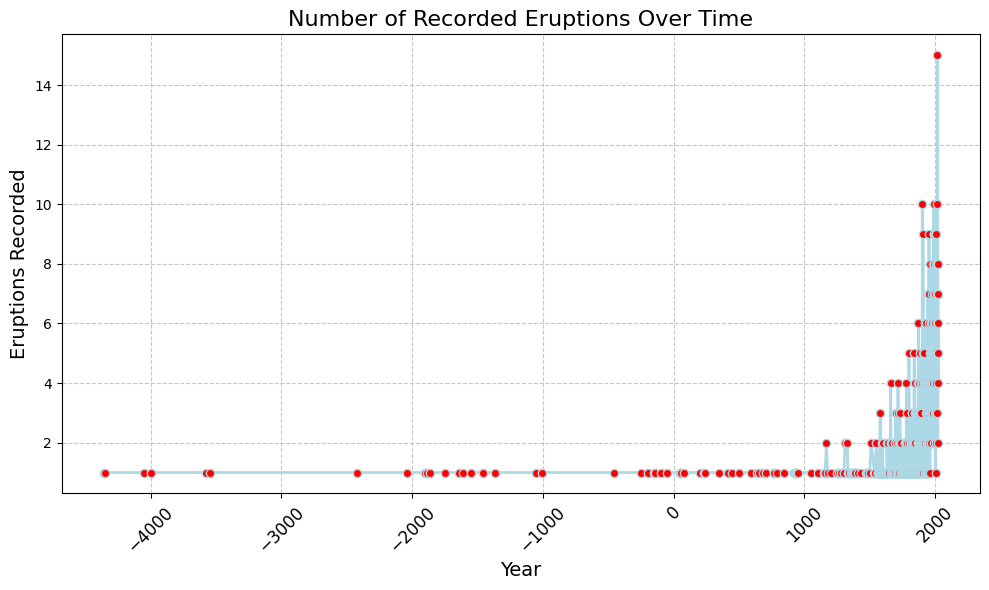

In [82]:
# Line chart for eruptions over time
plt.figure(figsize=(10, 6))
eruption_counts.plot(kind='line', color='lightblue', marker='o', markerfacecolor='red', linestyle='-', linewidth=2)

# Labels and title for the line chart
plt.title('Number of Recorded Eruptions Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Eruptions Recorded', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show line chart
plt.tight_layout()
plt.show()

In [83]:
# Count the number of volcanoes in each country
country_counts = volcano_df['Country'].value_counts()

# Select the top 10 countries with the highest number of volcanoes
top_countries = country_counts.head(10)

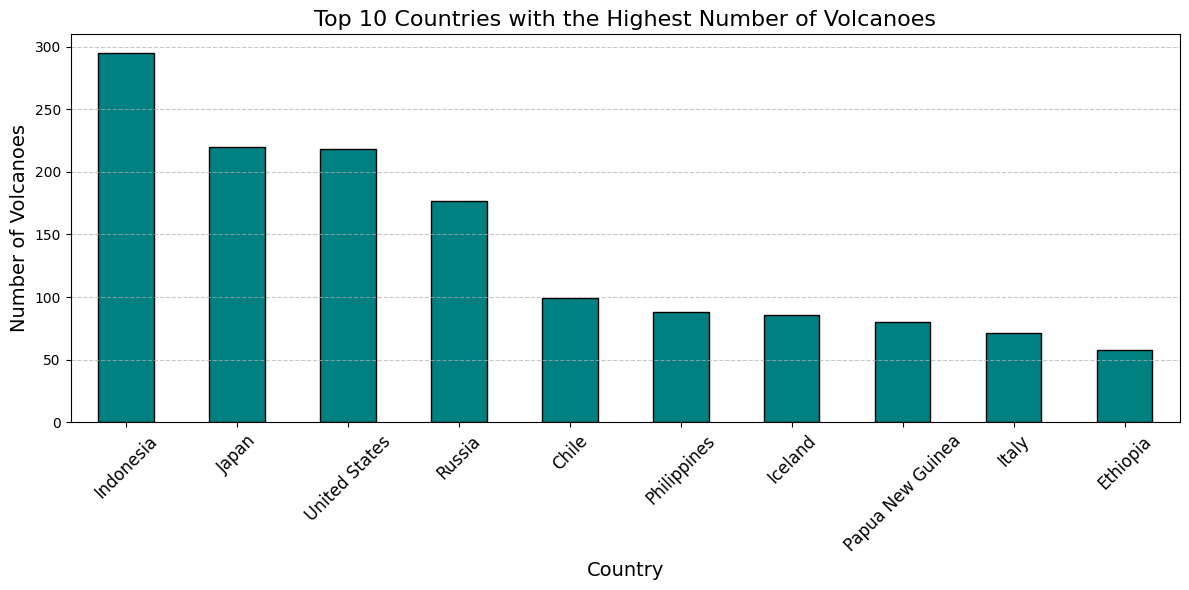

In [84]:
# Create a bar chart
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='teal', edgecolor='black')

# Add labels and title
plt.title('Top 10 Countries with the Highest Number of Volcanoes', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Volcanoes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [85]:
# Ensure numeric
volcano_df['vei'] = pd.to_numeric(volcano_df['vei'], errors='coerce')
vei_counts = volcano_df['vei'].dropna().astype(int).value_counts().sort_index()

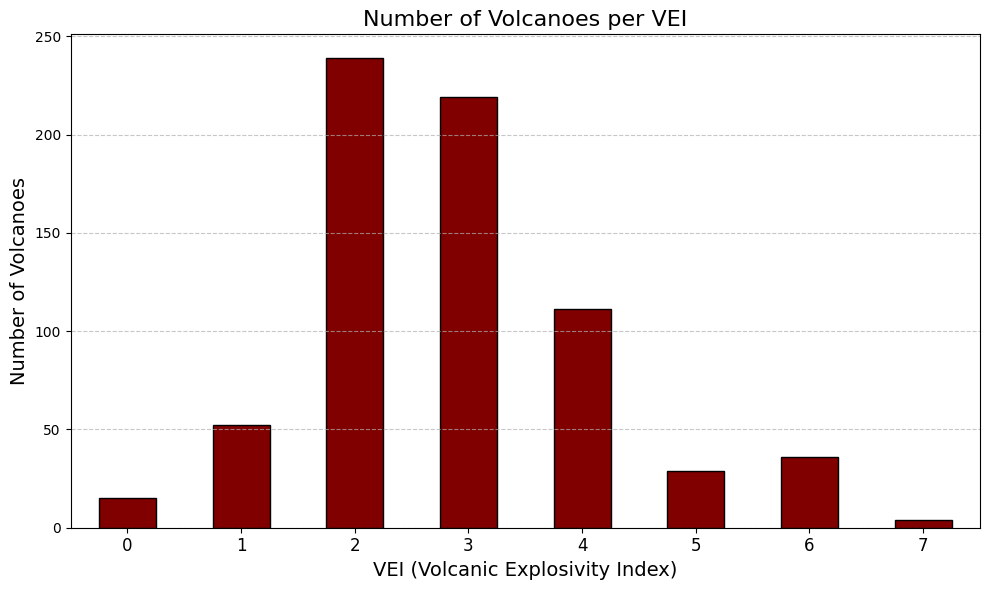

In [86]:
# Bar chart for number of volcanoes per VEI
plt.figure(figsize=(10, 6))
vei_counts.plot(kind='bar', color='maroon', edgecolor='black')

# Labels and title
plt.title('Number of Volcanoes per VEI', fontsize=16)
plt.xlabel('VEI (Volcanic Explosivity Index)', fontsize=14)
plt.ylabel('Number of Volcanoes', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()